In [1]:
!pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn import tree, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from yellowbrick.classifier import ClassificationReport

## Лабораторная работа 3.

Деревья решений. Ансамбли решающих деревьев.

1. Выбрать подходящую таблицу данных

https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook

In [3]:
df = pd.read_csv('penguins_size.csv')
features = ['island','culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex']
classes = df["species"]. unique()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


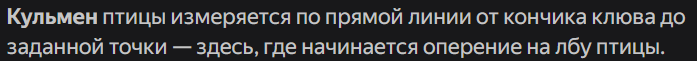

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Смотрим строчки, где отсутствует какая-либо информация

<Axes: >

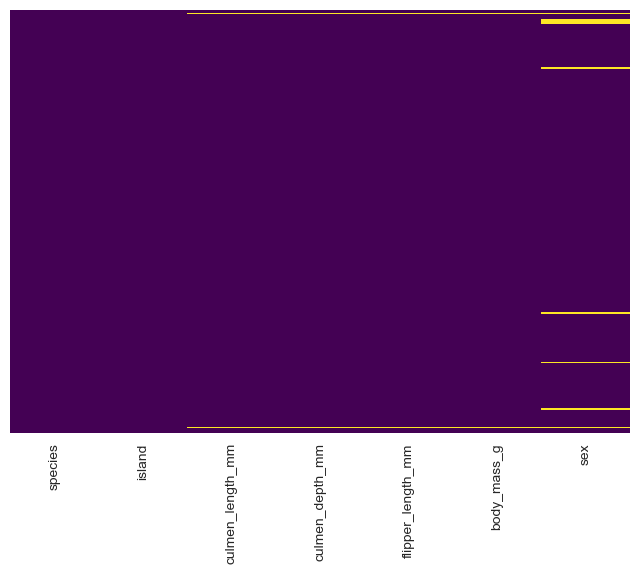

In [5]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Этих строчек мало(10), поэтому дропаю их

<Axes: >

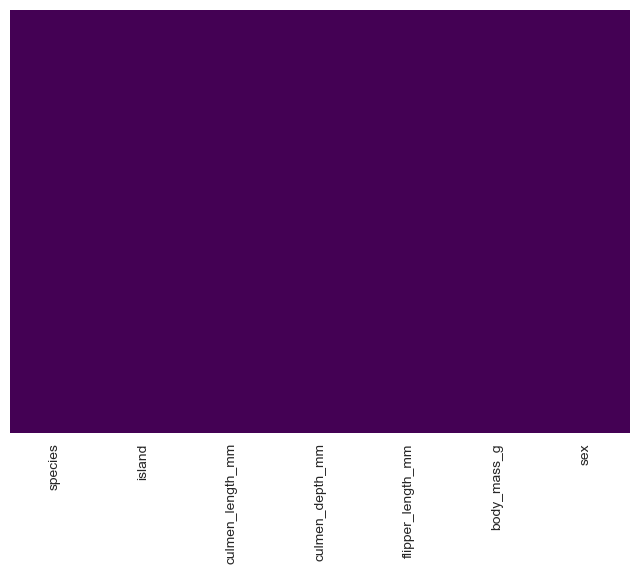

In [6]:
df.dropna(inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

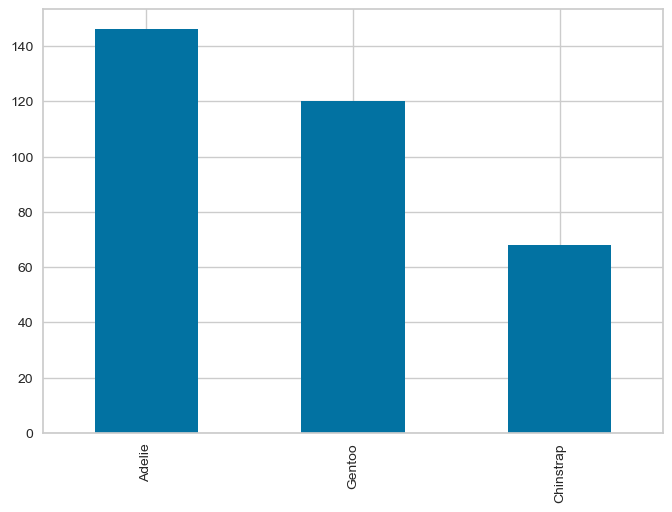

In [7]:
df['species'].value_counts().plot(kind='bar')

Построить и визуализировать дерево решений.

In [8]:
lb = LabelEncoder()
df["species"] = lb.fit_transform(df["species"])
df["island"] = lb.fit_transform(df["island"])
df["sex"] = lb.fit_transform(df["sex"])

In [9]:
x = df[['island','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g', 'sex']]
y = df['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

D:\conda\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


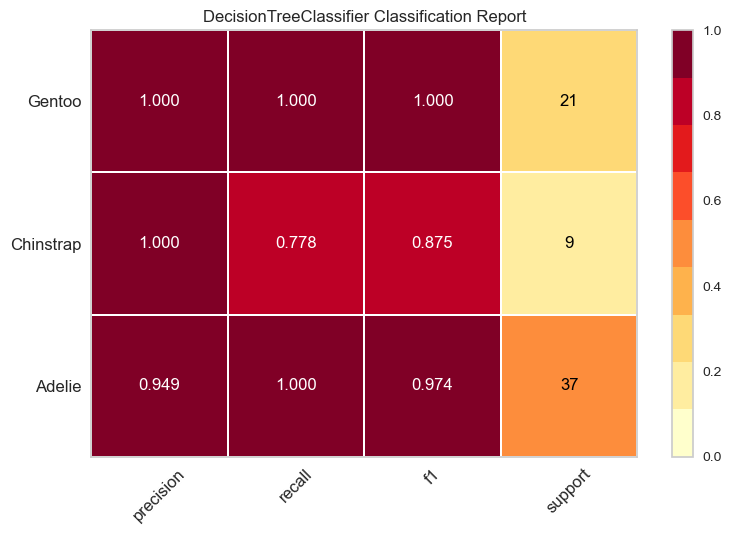

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [11]:
y_pred = model.predict(x_test)

vis = ClassificationReport(model, classes=classes, support=True)
vis.score(x_test, y_test)        # Evaluate the model on the test data
vis.show()                       # Finalize and show the figure

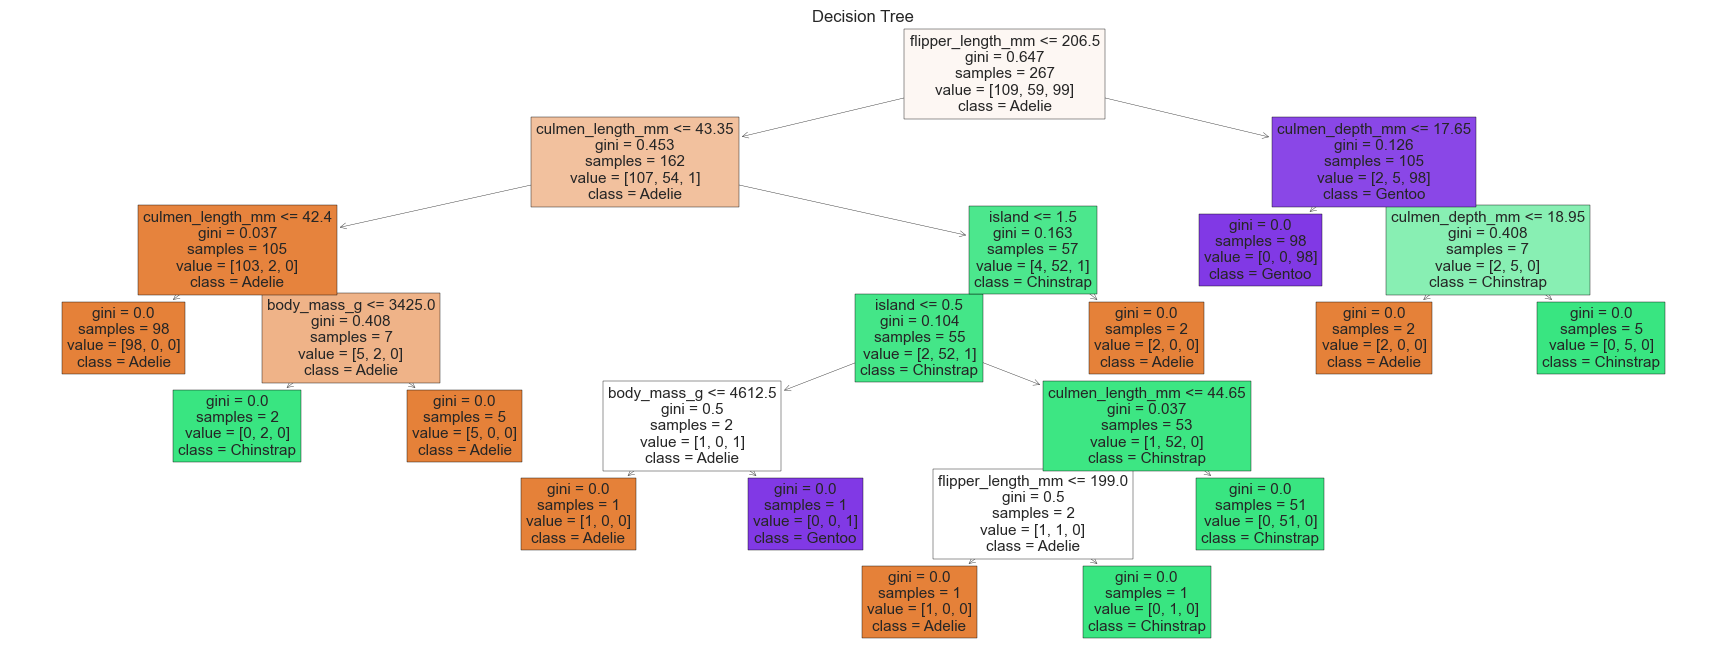

In [12]:
plt.figure(figsize=(22, 8))

tree.plot_tree(model, feature_names=features, class_names=classes, filled=True)
plt.title("Decision Tree")
plt.show()

2. Применить метод градиентного бустинга. Вычислить значимость переменных. Выдать список построенных деревьев.

https://habr.com/ru/companies/ods/articles/327250/

https://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html?ysclid=lp8hma13xd54193040

https://neurohive.io/ru/osnovy-data-science/gradientyj-busting/

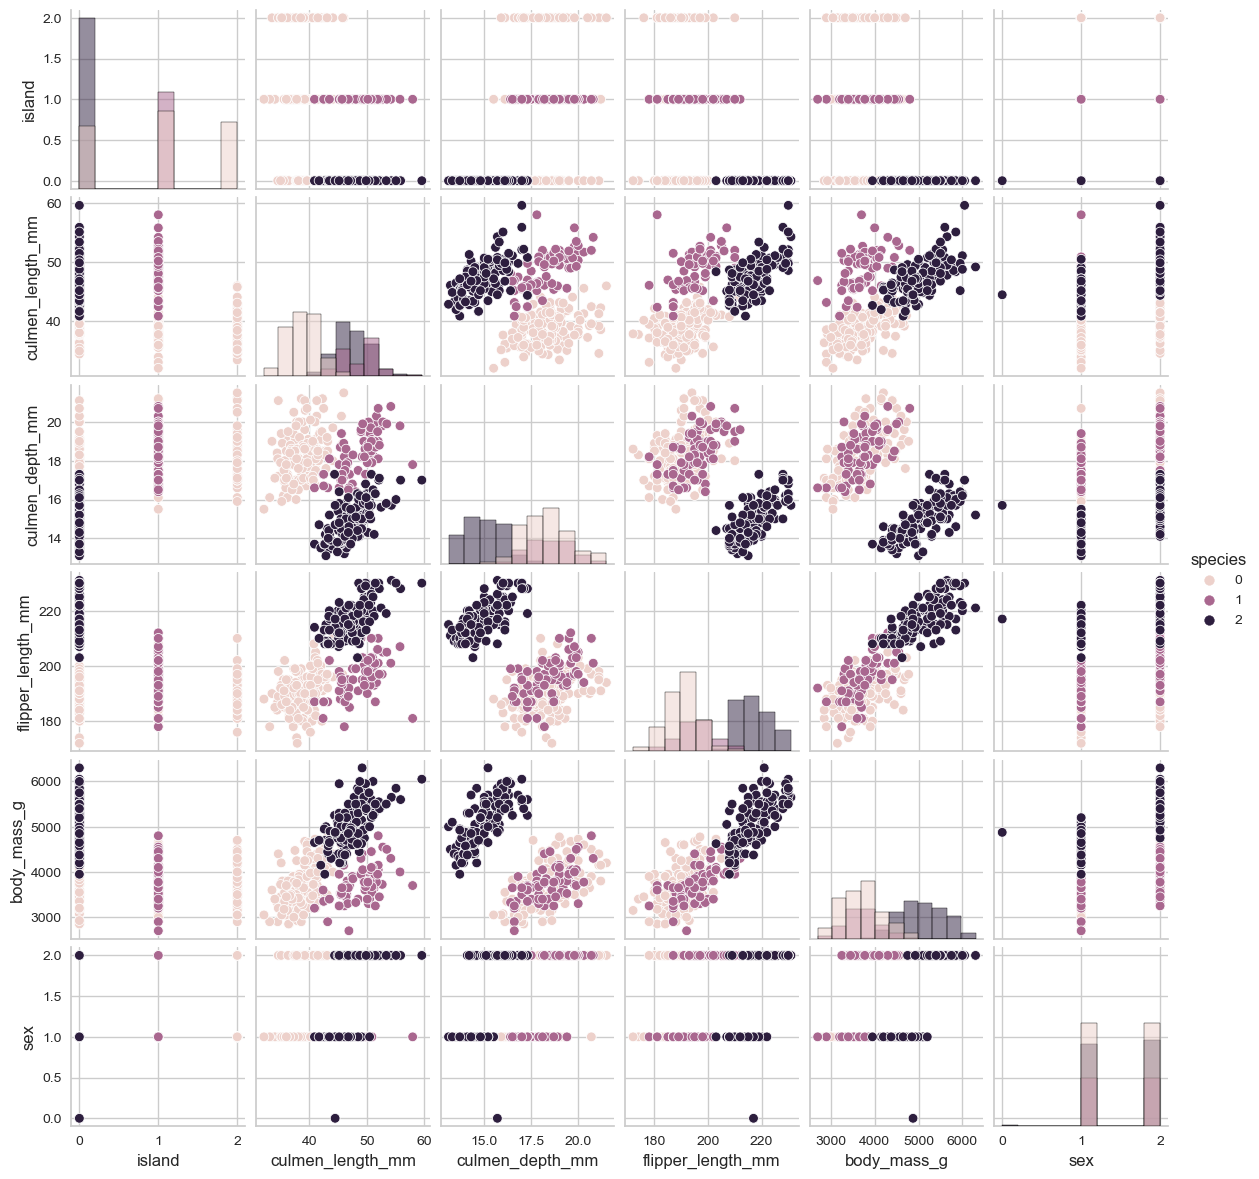

In [13]:
sns.pairplot(df, hue="species", height=2,diag_kind="hist")#корреляция

D:\conda\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


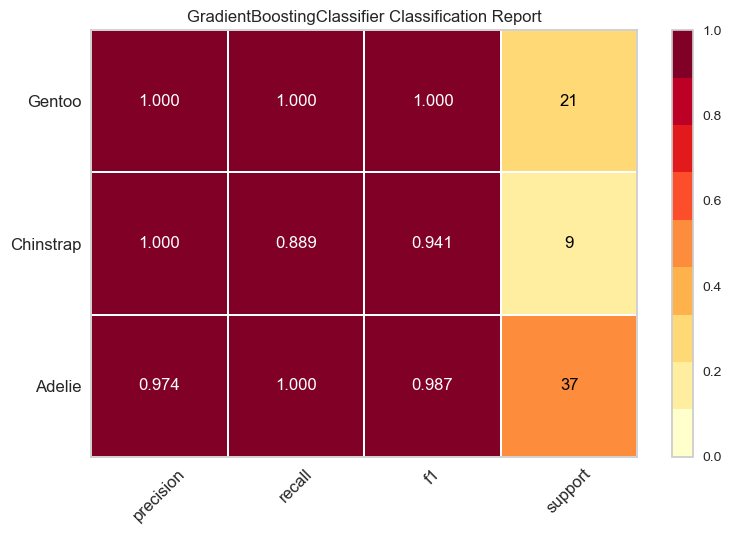

<Axes: title={'center': 'GradientBoostingClassifier Classification Report'}>

In [14]:
model = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=0)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

vis = ClassificationReport(model, classes=classes, support=True)
vis.score(x_test, y_test)        # support = вхождения
vis.show()                       

Text(0.5, 1.0, 'Важность признаков')

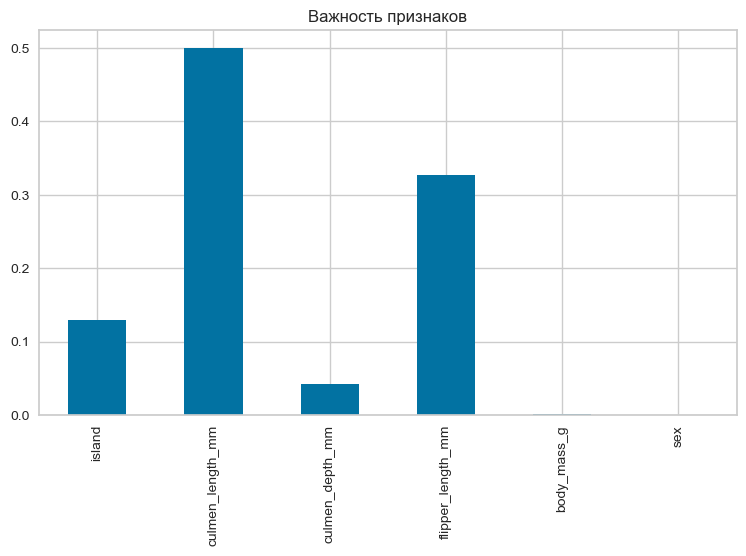

In [15]:
imp = model.feature_importances_
viz_imp = pd.Series(imp, df.drop(['species'], axis=1).columns)
fig, ax = plt.subplots(figsize=(9,5))
viz_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")

In [16]:
model.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x273B76C4040),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x273B76C4040),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x273B76C4040)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x273B76C4040),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x273B76C4040),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x273B76C4040)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                 

3. Построить зависимость качества решения (на обучении и скользящем контроле) от числа вершин дерева.

In [23]:
train, val, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))]) #60%, 20%, 20%
x_train = train[features]
y_train = train["species"]

x_val = val[features]
y_val = val["species"]

x_test = test[features]
y_test = test["species"]

In [24]:
from sklearn.metrics import accuracy_score
train_acc = []
val_acc = []
for i in range(2,50):
    model = GradientBoostingClassifier(n_estimators=50, max_leaf_nodes=i, random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    train_acc.append(accuracy_score(y_test,y_pred))
    
    model.fit(x_val, y_val)
    y_pred = model.predict(x_test)
    val_acc.append(accuracy_score(y_test,y_pred))

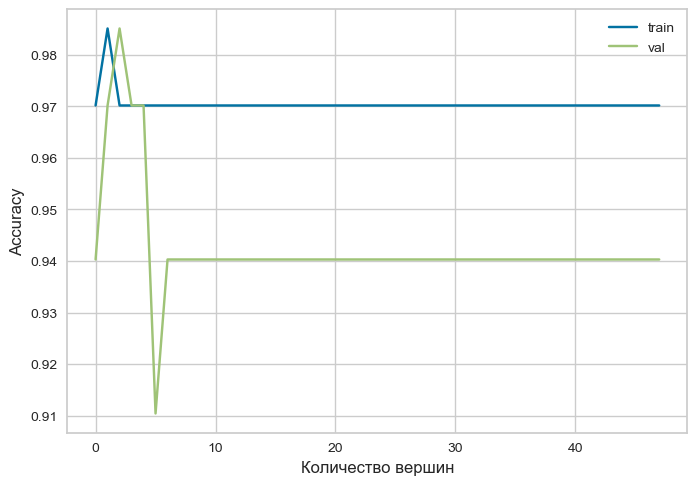

In [25]:
plt.plot(train_acc, label = "train")
plt.plot(val_acc, label = "val")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Количество вершин")
plt.show()

4. Для метода градиентного бустинга построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.
Для разной глубины дерева нужно построить несколько зависимостей качества от числа деревьев, чтобы найти оптимальную комбинацию этих параметров.

Max_depth 3


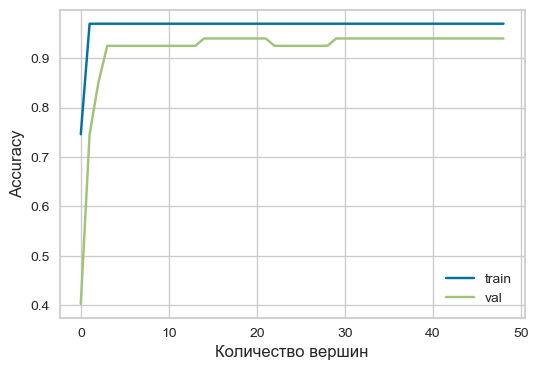

Max_depth 5


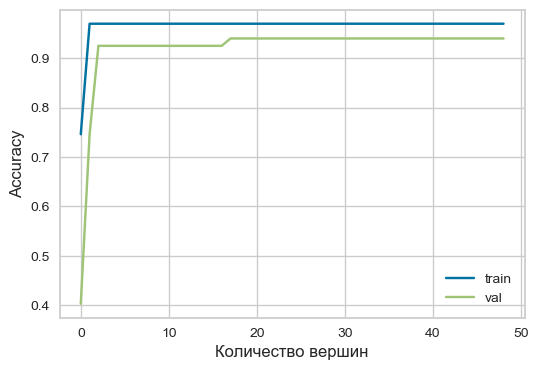

Max_depth 7


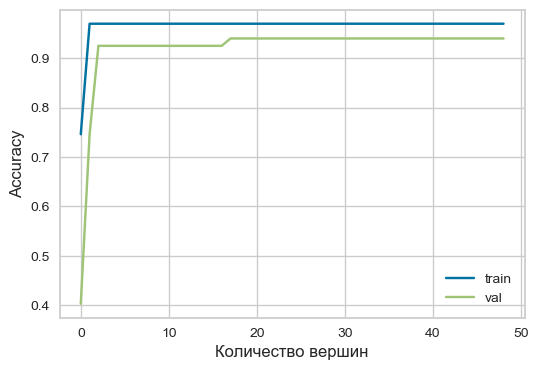

Max_depth 10


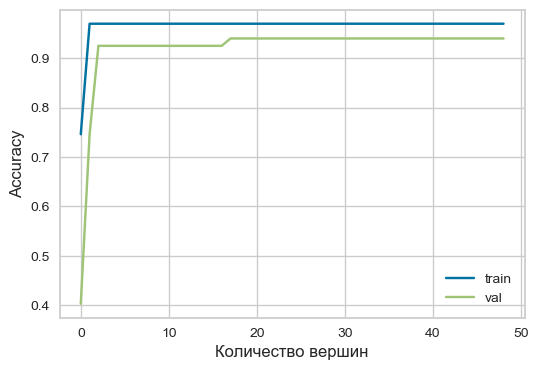

Max_depth 15


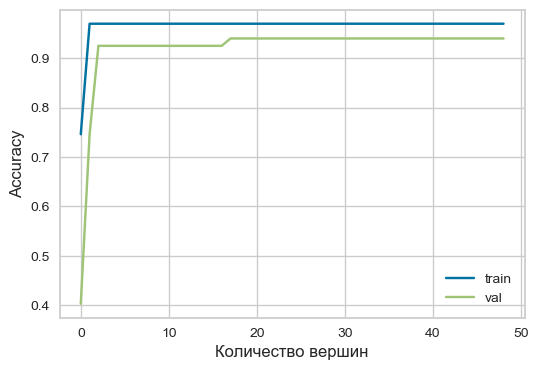

Max_depth 30


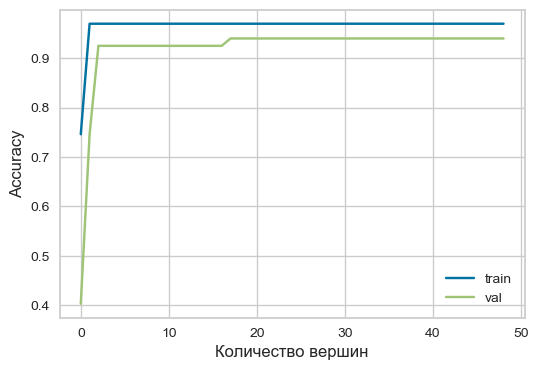

In [26]:
for j in [3, 5, 7, 10, 15,30]:
    train_acc = []
    val_acc = []
    print("Max_depth", j)
    for i in range(1,50):
        model = GradientBoostingClassifier(n_estimators=i, max_depth=j, random_state=0)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        train_acc.append(accuracy_score(y_test,y_pred))
        
        model = GradientBoostingClassifier(n_estimators=i, max_depth=j, random_state=0)
        model.fit(x_val, y_val)
        y_pred = model.predict(x_test)
        val_acc.append(accuracy_score(y_test,y_pred))
        
    plt.figure(figsize=(6, 4))
    plt.plot(train_acc, label = "train")
    plt.plot(val_acc, label = "val")
    plt.legend()
    plt.ylabel("Accuracy")
    plt.xlabel("Количество вершин")
    plt.show()

5. Выполнить предыдущий пункт для случайного леса.

Max_depth 3


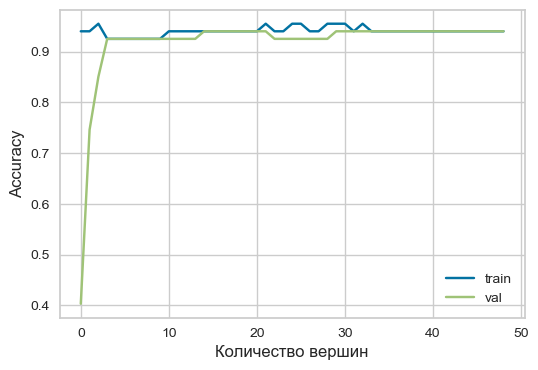

Max_depth 5


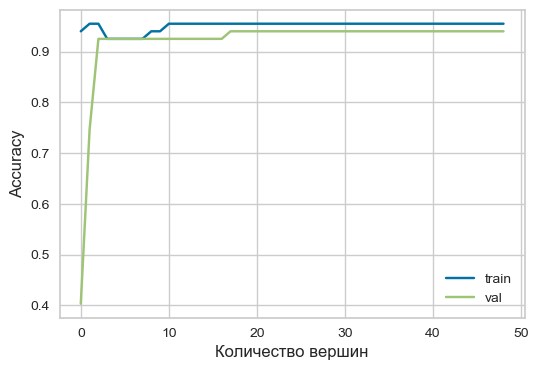

Max_depth 7


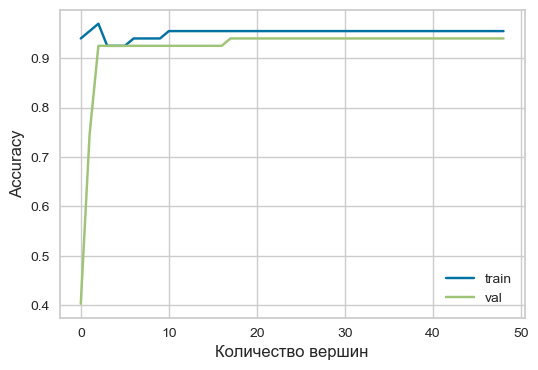

Max_depth 10


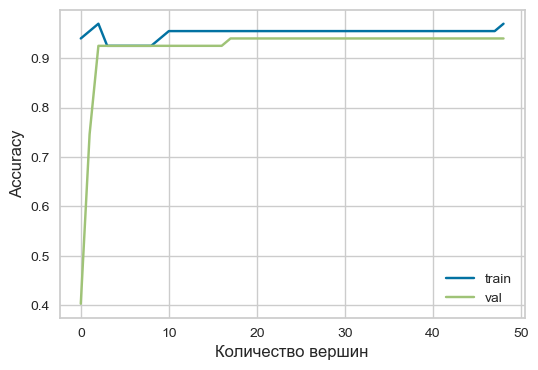

Max_depth 15


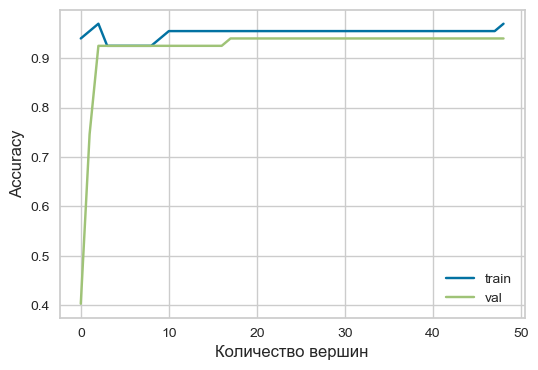

Max_depth 30


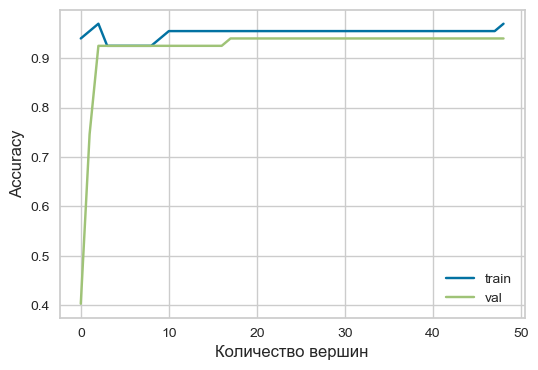

In [27]:
from sklearn.ensemble import RandomForestClassifier
for j in [3, 5, 7, 10, 15,30]:
    train_acc = []
    val_acc = []
    print("Max_depth", j)
    for i in range(1,50):
        model = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=0)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        train_acc.append(accuracy_score(y_test,y_pred))
        
        model = GradientBoostingClassifier(n_estimators=i, max_depth=j, random_state=0)
        model.fit(x_val, y_val)
        y_pred = model.predict(x_test)
        val_acc.append(accuracy_score(y_test,y_pred))
        
    plt.figure(figsize=(6, 4))
    plt.plot(train_acc, label = "train")
    plt.plot(val_acc, label = "val")
    plt.legend()
    plt.ylabel("Accuracy")
    plt.xlabel("Количество вершин")
    plt.show()